Zad 3

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import time 

In [3]:
def exp_simulation(num, lambda_): #symumlowanie rozkładu wykładniczego
    sample = np.random.rand(num)
    return (-1)/lambda_ * np.log(1-sample)

In [4]:
def generate_normal(n, sigma, mi): #generowanie rozkładu normalnego z wykładczniego
    samples = []
    iterations = 1
    sigmas = [sigma] * n
    mis = [mi] * n
    while len(samples) < n:
        iterations += 1
        y = exp_simulation(1,1)[0]
        u = np.random.uniform()
        if u <= np.exp(-(y-1)**2/2):
            u2 = np.random.uniform()
            if u2 < 0.5:
                samples.append(y)
            else:
                samples.append(-y)
    return np.add(np.divide(samples,mis), sigmas), n*100/iterations
    

In [ ]:
n1 = 10000
mi1 = 0
sigma1 = 1

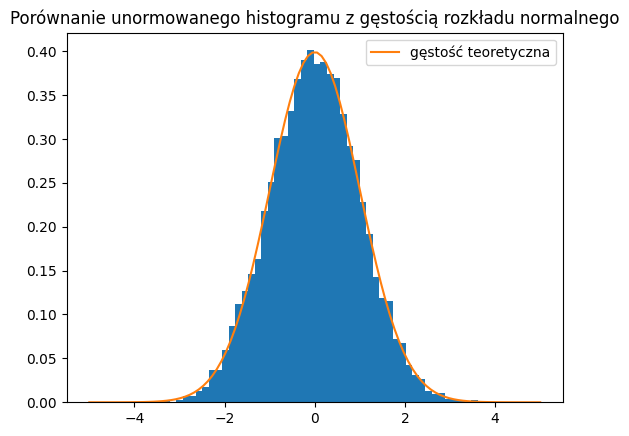

In [8]:
sample = generate_normal(n1, mi1, sigma1)[0]
xs = np.linspace(-5,5, 100)
plt.hist(sample, density=True, bins=50)
plt.plot(xs, norm.pdf(xs, mi1, sigma1), label="gęstość teoretyczna")
plt.title("Porównanie unormowanego histogramu z gęstością rozkładu normalnego")
plt.legend(loc='best')
plt.show()

Zadanie 4

In [9]:
def przedzialy(f, k, x_0, x_k): #funkcja tworząca przedziały i wyszukująca maksima i minima
    xs = np.linspace(x_0, x_k, k)
    f_min = []
    f_max = []
    for i in range(k-1):
        f_min.append(min([f(j) for j in np.linspace(xs[i], xs[i+1], 10**3)]))
        f_max.append(max([f(j) for j in np.linspace(xs[i], xs[i+1], 10**3)]))
    return f_min, f_max

In [10]:
def ziggurat(f, g, f_min, f_max, k,x_0, x_k, n, c):
    xs = np.linspace(x_0, x_k, k)
    samples = []
    while len(samples) < n:
        u = np.random.uniform()
        u2 = np.random.uniform(-1,1)
        x = exp_simulation(1,1)[0]
        ind = 0
        for i in range(k-1):
            if xs[i] <= x <= xs[i+1]:
                ind = i
        if u*c*g(x) < f_min[ind]:
            if u2 > 0:
                samples.append(x)
            else:
                samples.append(-x)
        elif u*c*g(x) > f_max[ind]:
            continue
        else:
            if u*c*g(x) < f(x):
                if u2 > 0:
                    samples.append(x)
                else:
                    samples.append(-x)
    return samples

In [11]:
def exp_cdf(x): #dystrybuanta rozkładu Exp(1)
    return np.exp(-x)

In [12]:
def normal_cdf(x): #Dystrybuanta rozkładu N(0,1)
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

In [13]:
k = 100 #liczba przedziałow
x_0 = -10 #wartość początkowa przedziałów
x_k = 10 #wartość końcowa przedziałów
n2 = 10000 #liczba próbek
c = 1/np.sqrt(np.exp(1)) #stała do metody zigguratu
f_min, f_max = przedzialy(normal_cdf, k, x_0, x_k) #zapisujemy w pamięci wartości minimalne i maksymalne gęstości szukanej zmiennej

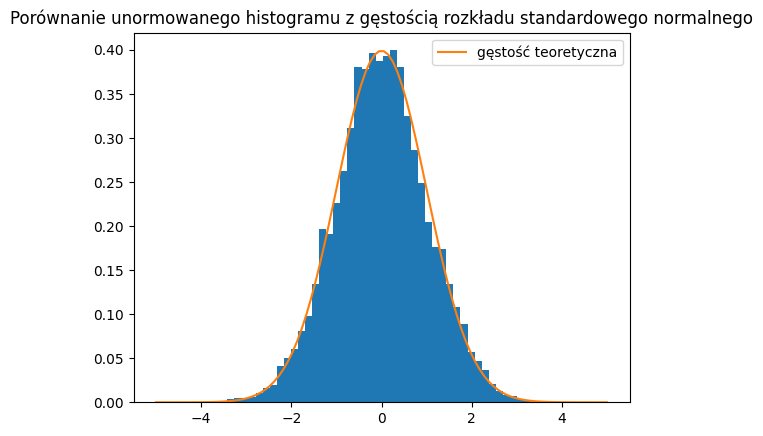

In [14]:
samples2 = ziggurat(normal_cdf, exp_cdf, f_min, f_max, k, x_0, x_k, n2, c)
xs2 = np.linspace(-5,5, 100)
plt.hist(samples2, density=True, bins=50)
plt.plot(xs2, norm.pdf(xs, 0, 1), label="gęstość teoretyczna")
plt.title("Porównanie unormowanego histogramu z gęstością rozkładu standardowego normalnego")
plt.legend(loc='best')
plt.show()

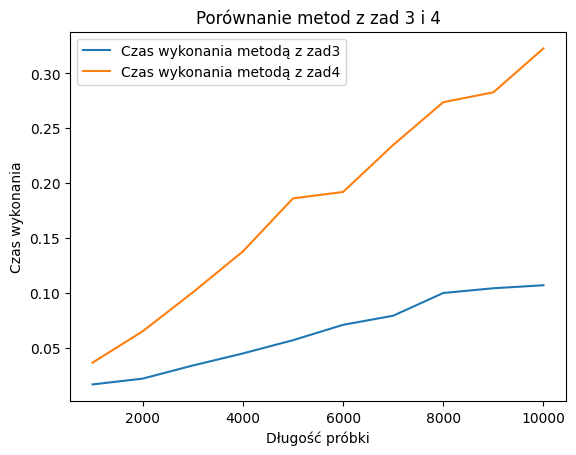

In [15]:
#porównujemy czasy
ns = np.linspace(1000, 10000, 10)
times_zad3 = []
times_zad4 = []
for n in ns:
    start1 = time.time()
    generate_normal(int(n), 0, 1)
    end1 = time.time()
    times_zad3.append(end1-start1)
    start2 = time.time()
    ziggurat(normal_cdf, exp_cdf, f_min, f_max, k, x_0, x_k, int(n), c)
    end2 = time.time()
    times_zad4.append(end2-start2)
plt.plot(ns, times_zad3, label="Czas wykonania metodą z zad3")
plt.plot(ns, times_zad4, label="Czas wykonania metodą z zad4")
plt.legend(loc="best")
plt.title("Porównanie metod z zad 3 i 4")
plt.xlabel("Długość próbki")
plt.ylabel("Czas wykonania")
plt.show()
